In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd


import string
import collections
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import nltk
#% matplotlib inline


In [3]:
# loading the data file
df = pd.read_csv('all.csv')
print(df)

      Unnamed: 0     type                                    content_cleaned  \
0              1  article  speaker robin vos r rochester senate majority ...   
1             14  article                                       page looking   
2             15  article  contrary narrative pushed mainstream covid 19 ...   
3             24  article  programming alert exclusive documentary origin...   
4             30  article  buffalo ny wivbmayor byron brown handing mask ...   
...          ...      ...                                                ...   
1742        1573  article  rush transcript week george stephanopoulos air...   
1743        1576  article  unprecedented moment american history need unp...   
1744        1578  article  gov greg abbott tuesday issued amount statewid...   
1745        1586  article  pulled trajectory chart work new version added...   
1746        1588  article  fox business lou dobbs relentlessly grilled tr...   

      label  
0         1  
1         1

# (i)Number of Fake and Real News

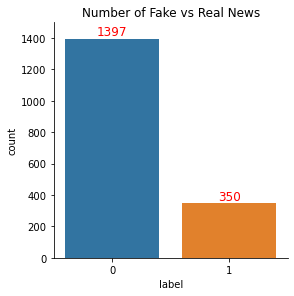

In [3]:
import seaborn as sns
import math

def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

sns.factorplot('label', data=df, kind='count', alpha=1.0, size=4, aspect=1).set(title='Number of Fake vs Real News')
# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = df['label'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

plt.show()

# (ii)Most Frequent Words for Real and Fake News

### Wordcloud for fake news

In [4]:
fake = df[df.label == 1]
print(fake.shape)
print(fake)

(350, 4)
     Unnamed: 0     type                                    content_cleaned  \
0             1  article  speaker robin vos r rochester senate majority ...   
1            14  article                                       page looking   
2            15  article  contrary narrative pushed mainstream covid 19 ...   
3            24  article  programming alert exclusive documentary origin...   
4            30  article  buffalo ny wivbmayor byron brown handing mask ...   
..          ...      ...                                                ...   
345         831     post                                 want join facebook   
346         833     post                                 want join facebook   
347         834     post  uk director king college london institute canc...   
348         835     post                      see viviane dinehart facebook   
349         836     post                      see randall thompson facebook   

     label  
0        1  
1        1  
2  

In [5]:
all_fake = fake['content_cleaned'].str.split(' ')
all_fake.head()

0    [speaker, robin, vos, r, rochester, senate, ma...
1                                      [page, looking]
2    [contrary, narrative, pushed, mainstream, covi...
3    [programming, alert, exclusive, documentary, o...
4    [buffalo, ny, wivbmayor, byron, brown, handing...
Name: content_cleaned, dtype: object

In [6]:
all_fake_cleaned = []

for text in all_fake:
    text = [x.strip(string.punctuation) for x in text]
    all_fake_cleaned.append(text)

all_fake_cleaned[0]

text_fake = [" ".join(text) for text in all_fake_cleaned]
final_text_fake = " ".join(text_fake)
final_text_fake[:1000]

'speaker robin vos r rochester senate majority leader scott fitzgerald r juneau released following statement filing original action wisconsin state supreme court challenging governor extension safer home order may 26th public outcry safer home order continues increase positive covid case decrease remain flat immense frustration regarding extension go beyond executive branch statutory power page looking contrary narrative pushed mainstream covid 19 virus result natural mutation transmitted human bat via pangolin dr luc montagnier man discovered hiv virus back 1983 disagrees saying virus man made follow luc montagnier insists virus came lab follow interview read also line remdesivir chloroquine azithromycin might also shorten hospital stay programming alert exclusive documentary origin ccp virus premiere first documentary movie origin ccp virus tracking origin wuhan coronavirus premiere tonight several youtube facebook channel ccp virus originated china rampaged world caused 80000 death 

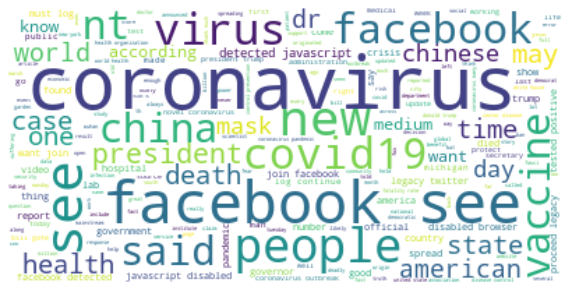

In [7]:
wordcloud_spam = WordCloud(background_color="white").generate(final_text_fake)

# Lines 2 - 5
plt.figure(figsize = (10,10))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud for real news

In [8]:
real = df[df.label == 0]
print(real.shape)

(1397, 4)


In [9]:
all_real = real['content_cleaned'].str.split(' ')
all_real.head()

350    [expert, warn, state, reopening, still, nt, en...
351    [new, study, find, increase, screen, time, nt,...
352    [scientist, around, world, working, number, va...
353    [coronaviruses, cause, respiratory, illness, l...
354    [medical, expert, studying, remdesivir, help, ...
Name: content_cleaned, dtype: object

In [10]:
all_real_cleaned = []

for text in all_real:
    text = [x.strip(string.punctuation) for x in text]
    all_real_cleaned.append(text)

all_real_cleaned[0]

text_real = [" ".join(text) for text in all_real_cleaned]
final_text_real = " ".join(text_real)
final_text_real[:1000]

'expert warn state reopening still nt enough testing u state start loosen stay home order expert warn covid19 could come back enough testing according associated press significant number state reopening still meeting key testing benchmark suggested harvard global health institute according institute world health organization enough testing done new study find increase screen time nt hurt kid social skill getty image new study found despite time spent smartphones today young people socially skilled previous generation researcher compared teacher parent evaluation kid entered kindergarten 1998 year facebook child 2010 even child within group experienced heaviest exposure screen showed similar developme scientist around world working number vaccine treatment covid19 xinhua zhang yuwei via getty image scientist around world working potential treatment vaccine new coronavirus disease known covid19 several company working antiviral drug already use illness treat people already covid19 compan

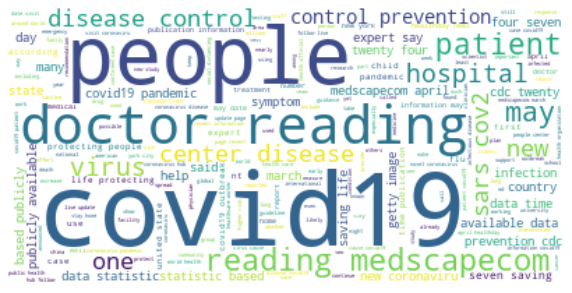

In [11]:
wordcloud_spam = WordCloud(background_color="white").generate(final_text_real)

# Lines 2 - 5
plt.figure(figsize = (10,10))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

# (iii)Types for different News Class

In [12]:
real_type = df[df.label == 1]
real_type['type'].value_counts()

post       178
article    172
Name: type, dtype: int64

In [13]:
fake_type = df[df.label == 0]
fake_type['type'].value_counts()

article    1397
Name: type, dtype: int64

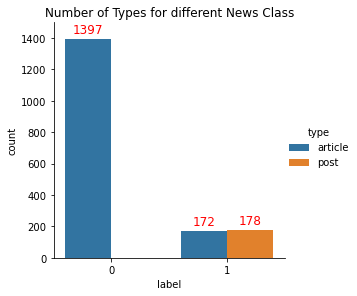

In [8]:
import seaborn as sns
import math

def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

sns.factorplot('label', hue="type", data=df, kind='count', alpha=1.0, size=4, aspect=1).set(title='Number of Types for different News Class')
# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = df['label'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    fontsize=12, color='red',
                  # size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    

plt.show()

# (iv)	Comparison of content length of fake and real news according to their New Class

In [90]:
df['content_cleaned_len'] = df['content_cleaned'].astype(str).apply(len)
df['word_count'] = df['content_cleaned'].apply(lambda x: len(str(x).split()))

In [91]:
print(df)

      Unnamed: 0     type                                    content_cleaned  \
0              1  article  speaker robin vos r rochester senate majority ...   
1             14  article                                       page looking   
2             15  article  contrary narrative pushed mainstream covid 19 ...   
3             24  article  programming alert exclusive documentary origin...   
4             30  article  buffalo ny wivbmayor byron brown handing mask ...   
...          ...      ...                                                ...   
1742        1573  article  rush transcript week george stephanopoulos air...   
1743        1576  article  unprecedented moment american history need unp...   
1744        1578  article  gov greg abbott tuesday issued amount statewid...   
1745        1586  article  pulled trajectory chart work new version added...   
1746        1588  article  fox business lou dobbs relentlessly grilled tr...   

      label  content_cleaned_len  word_

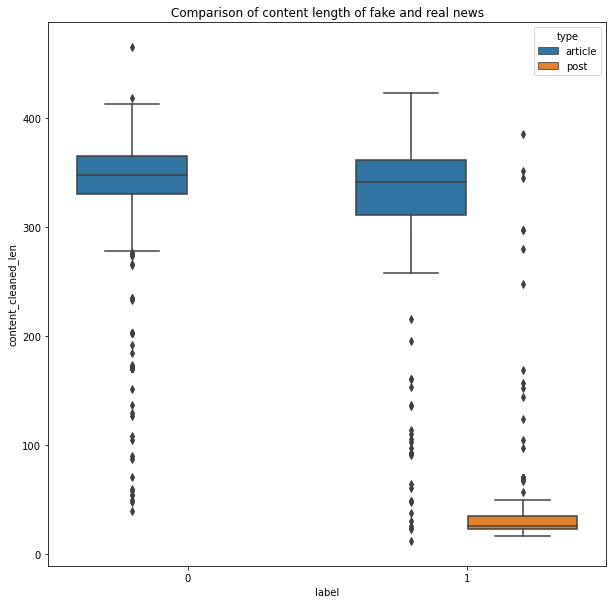

In [92]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='label', y="content_cleaned_len", hue="type", data=df).set_title("Comparison of content length of fake and real news")

# (v)	Comparison of word count in fake and real news according to their information source

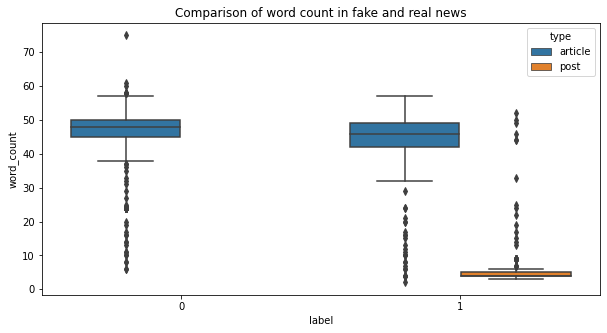

In [93]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='label', y="word_count", hue="type", data=df).set_title("Comparison of word count in fake and real news")
